In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Importing Karate Club Dataset

In [ ]:
import networkx as nx


In [ ]:
# load the graph
G = nx.karate_club_graph()
#Gk = nx.read_gml('karate.gml') #Provide the Path

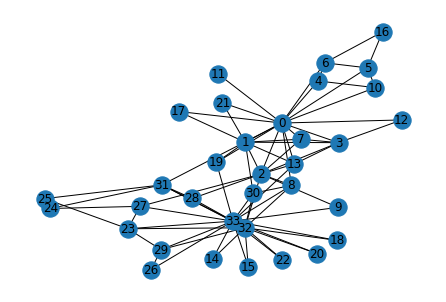

In [ ]:
nx.draw(G, with_labels = True)

In [ ]:
len(G.nodes),len(G.edges)

(34, 78)

In [ ]:
nx.average_shortest_path_length(G)

2.408199643493761

In [ ]:
nx.average_clustering(G)

0.5706384782076823

**1) Betweenness-based clustering using the Girvan-Newman 
algorithm on Karate Dataset**

In [ ]:
bet_K = nx.betweenness_centrality(G)

In [ ]:
print(bet_K)

{0: 0.43763528138528146, 1: 0.053936688311688304, 2: 0.14365680615680618, 3: 0.011909271284271283, 4: 0.0006313131313131313, 5: 0.02998737373737374, 6: 0.029987373737373736, 7: 0.0, 8: 0.05592682780182781, 9: 0.0008477633477633478, 10: 0.0006313131313131313, 11: 0.0, 12: 0.0, 13: 0.04586339586339586, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.03247504810004811, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.017613636363636363, 24: 0.0022095959595959595, 25: 0.0038404882154882154, 26: 0.0, 27: 0.02233345358345358, 28: 0.0017947330447330447, 29: 0.0029220779220779218, 30: 0.014411976911976909, 31: 0.13827561327561325, 32: 0.145247113997114, 33: 0.30407497594997596}


In [ ]:
#Edges of the graph are eliminated iteratively based on Highest Edge Betweeness Centrality Score
def girvan_newman(graph):
  def edge_to_remove(graph):
    bet_K = nx.edge_betweenness_centrality(G)
    edge=()

    for key, value in sorted(bet_K.items(), key=lambda item: item[1], reverse = True):
      edge=key
      break

    return edge

  # find number of connected components
  sg_K = nx.connected_components(G)
  sgcount_K = nx.number_connected_components(G)

  while(sgcount_K == 1):
    G.remove_edge(edge_to_remove(G)[0], edge_to_remove(G)[1])
    sg_K = nx.connected_components(G)
    sgcount_K = nx.number_connected_components(G)

  # result = [c.nodes() for c in sg_K]

  # for c in sg_K:
  #   result.extend(girvan_newman(c))

  return sg_K

In [ ]:
# communities in the graph
comm_K = girvan_newman(G.copy())

In [ ]:
comm_K

<generator object connected_components at 0x7f082025cf50>

In [ ]:
result_K = []

for i in comm_K:
  result_K.append(list(i))

print(result_K)

[[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]


We can see there are two communities / clusters are formed in the given dataset.

In [ ]:
# find modularity score
import networkx.algorithms.community as nx_comm
nx_comm.modularity(G, result_K)

0.48652261082646464